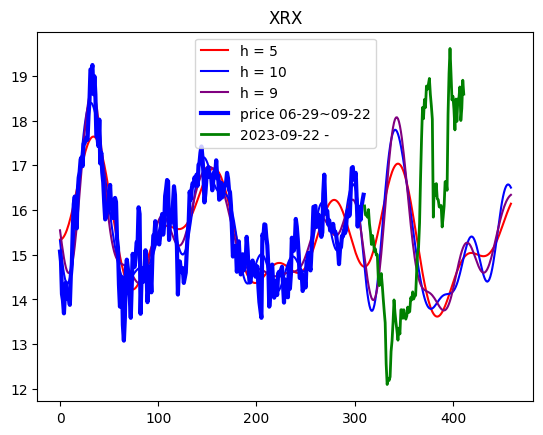

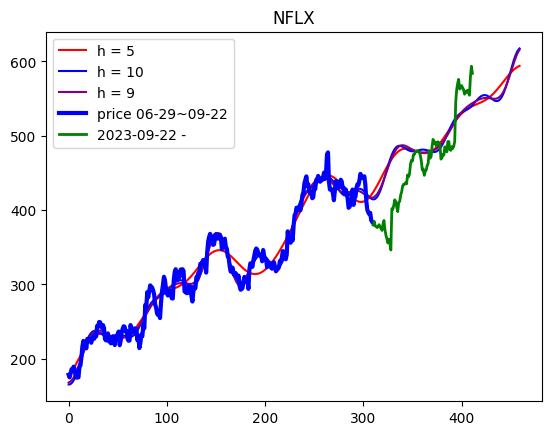

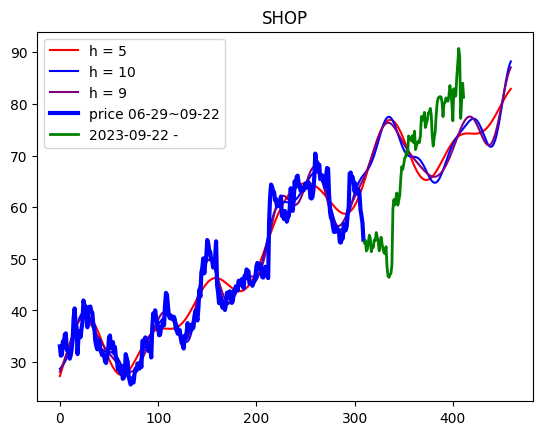

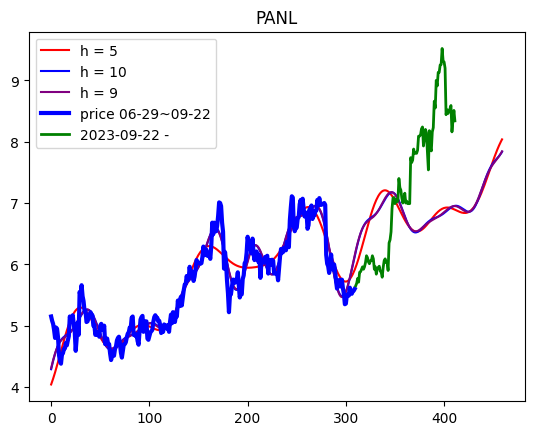

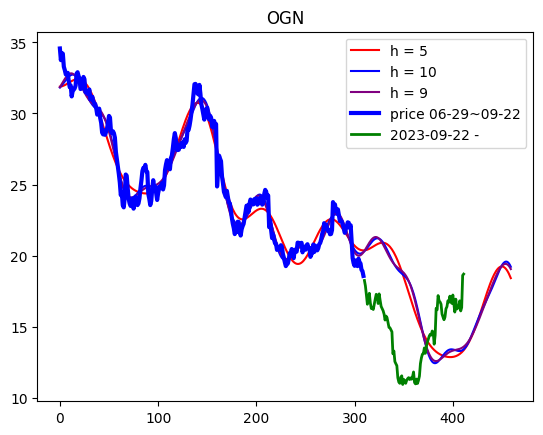

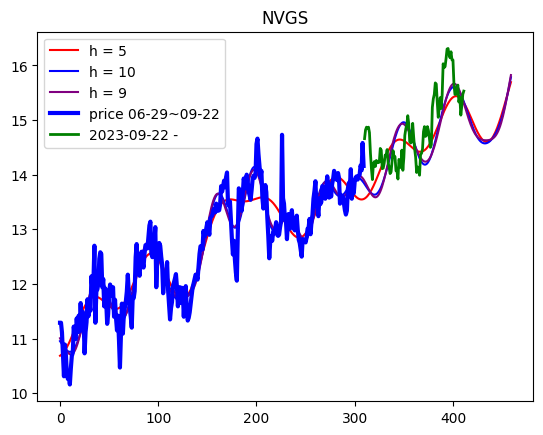

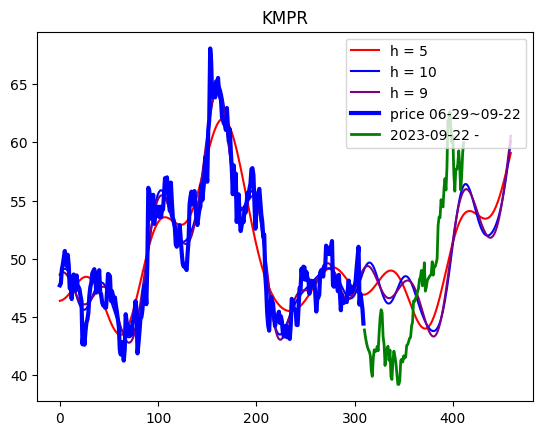

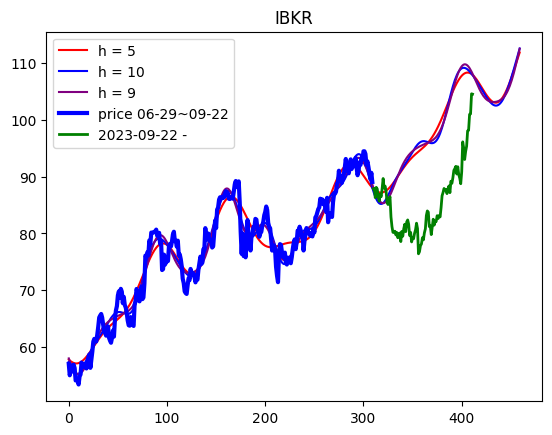

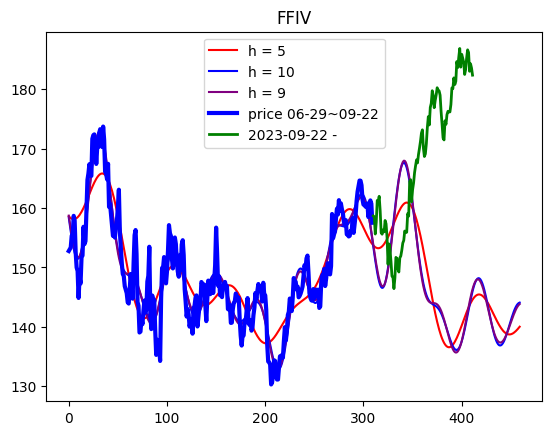

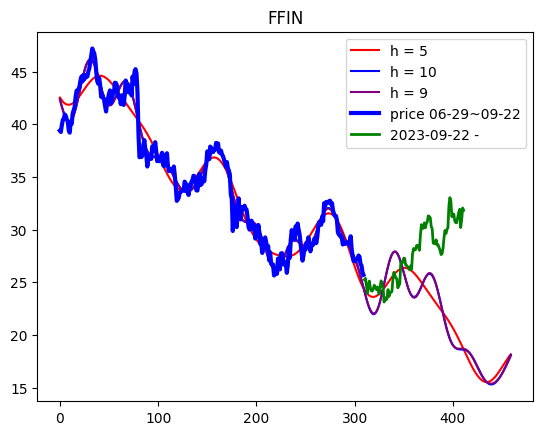

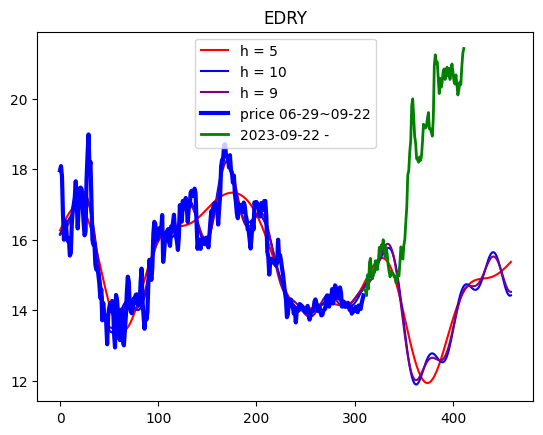

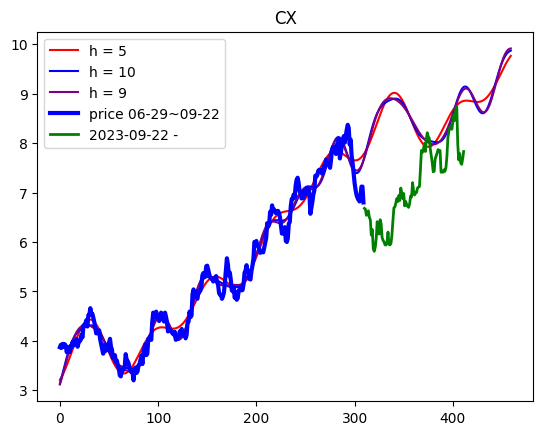

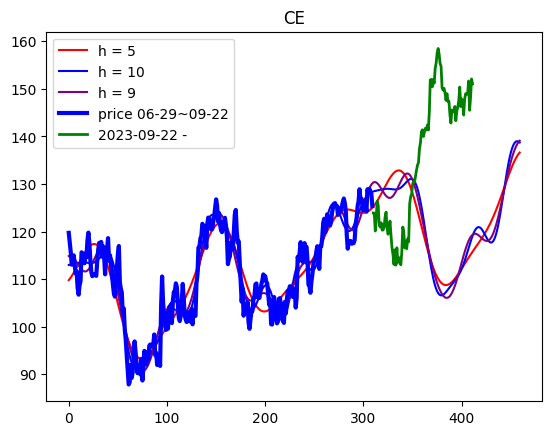

uptrend for max_min validation: ['NFLX', 'SHOP', 'PANL', 'NVGS', 'KMPR', 'IBKR', 'CX']
downtrend for max_min validation: ['XRX', 'OGN', 'FFIV', 'FFIN', 'EDRY', 'CE']
uptrend for linear regression validation:  ['XRX', 'NFLX', 'SHOP', 'NVGS', 'KMPR', 'IBKR', 'FFIV', 'FFIN', 'CX', 'CE']
downtrend for linear regression validation:  ['PANL', 'OGN', 'EDRY']
Stock with really uptrend:  ['XRX', 'NFLX', 'SHOP', 'PANL', 'OGN', 'NVGS', 'KMPR', 'IBKR', 'FFIV', 'FFIN', 'EDRY', 'CX', 'CE']
Stock with really downtrend:  []


In [2]:
# version 1
n_predict = 150
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
import numpy as np
from numpy import fft
import pylab as pl
ticker = "AAPL"
uptrend_1 = []
downtrend_1 = []
uptrend_2 = []
downtrend_2 = []
uptrend_3 = []
downtrend_3 = []
for ticker in ["XRX", "NFLX", "SHOP", "PANL", "OGN", "NVGS", "KMPR", "IBKR", "FFIV", "FFIN", "EDRY", "CX", "CE"]:
    # start = '2023-05-01'
    a = 600
    start = datetime.datetime.now() - datetime.timedelta(days=a)
    # end = '2023-10-01'
    end = start + datetime.timedelta(days=a-150)
    end_1 = start + datetime.timedelta(days=a-300)
    x = yf.download(ticker, start=start, end=end, progress=False, interval="1d")['Close']
    test = yf.download(ticker, start = end, progress=False)['Close']
    result_trend = np.polyfit(np.arange(0, test.size), test, deg=1)[0]
    n = x.size
    n_harm = 10  
    t = np.arange(0, n)        
    p = np.polyfit(t, x, deg=1)        

    x_notrend = x - p[0] * t        
    x_freqdom = fft.fft(x_notrend) 
    f = fft.fftfreq(n) 

    indexes = list(range(n))
    indexes.sort(key = lambda i: np.absolute(f[i]))

    t = np.arange(0, n + n_predict)
    iters = [5, 10, 9]
    for n_harm in iters:
        restored_sig = np.zeros(t.size)
        for i in indexes[:1 + n_harm * 2]:
            ampli = np.absolute(x_freqdom[i]) / n   # amplitude
            phase = np.angle(x_freqdom[i])          # phase
            restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
        extrapolation = restored_sig + p[0] * t
        color = "r" if n_harm == iters[0] else "b"
        if n_harm == 9:
            color = "purple"
        pl.plot(np.arange(0, extrapolation.size), extrapolation, color, label = f'h = {n_harm}')
    pl.plot(np.arange(0, x.size), x, 'b', label = f'price {start.strftime("%m-%d")}~{end.strftime("%m-%d")}', linewidth = 3)
    pl.plot(np.arange(x.size, x.size+test.size), test, 'g', label = f'{end.strftime("%Y-%m-%d")} - ', linewidth = 2)
    # pl.plot(np.arange(0, x.size), x_notrend, "y", label="x_notrend", linewidth = 3)
    pl.title(f"{ticker}")
    pl.legend()
    pl.show()
    last_close = x.iloc[-1]
    diffs = list(extrapolation[x.size:] - last_close)
    max_diff = max(diffs)
    min_diff = min(diffs)

    check_extrapolation_trend = np.polyfit(np.arange(0, len(test)), extrapolation[-(n_predict+test.size):-n_predict], deg=1)[0]

    if max_diff > abs(min_diff):
        uptrend_1.append(ticker)
    elif max_diff < abs(min_diff):
        downtrend_1.append(ticker)
    if result_trend > 0:
        uptrend_2.append(ticker)
    elif result_trend < 0:
        downtrend_2.append(ticker)

    if check_extrapolation_trend > 0:
        uptrend_3.append(ticker)
    elif check_extrapolation_trend < 0:
        downtrend_3.append(ticker)
print("uptrend for max_min validation:", uptrend_1)
print("downtrend for max_min validation:", downtrend_1)
print("uptrend for linear regression validation: ", uptrend_3)
print("downtrend for linear regression validation: ", downtrend_3)
print("Stock with really uptrend: ", uptrend_2)
print("Stock with really downtrend: ", downtrend_2)